In [136]:
from mxnet import nd, gluon
import matplotlib.pyplot as plt
import random

In [137]:
def transform(data, label):
    return (data/128).astype('float32').squeeze(axis=-1), label

In [138]:
def show_images(imgs, rows, cols):
    _, axes = plt.subplots(rows, cols)
    axes = axes.flatten()
    for ax, img in zip(axes, imgs):
        ax.imshow(img.asnumpy())
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    return axes

In [139]:
def computeYProbs(Y, n_classes):
    n_y = nd.zeros(n_classes)
    for i in range(n_classes):
        n_y[i] = (Y==i).sum()
    P_y = n_y / n_y.sum()
    return P_y, n_y

In [140]:
def computeXProbs(X, n_y, n_classes):
    n_x = nd.zeros((n_classes, X.shape[1], X.shape[2]))
    for i in range(n_classes):
        n_x[i] = nd.array(X.asnumpy()[Y==i].sum(axis=0))
    P_xy = (n_x+1) / (n_y+1).reshape((10, 1, 1))
    return P_xy

In [141]:
def predict(img, P_xy, P_y, n_classes):
    img = img.expand_dims(axis=0)
    log_P_xy = nd.log(P_xy)
    log_neg_P_xy = nd.log(1-P_xy)
    pxy = log_P_xy * img + log_neg_P_xy * (1-img)
    pxy = pxy.reshape((n_classes, -1)).sum(axis=1)
    probs = pxy + nd.log(P_y)
    return probs.argmax(axis=0)

In [142]:
mnist_train = gluon.data.vision.datasets.MNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.datasets.MNIST(train=False, transform=transform)
n_classes = 10

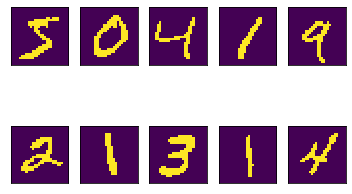

X shape (60000, 28, 28)
Y shape (60000,)


In [143]:
X, Y = mnist_train[:]
show_images(X, 2, 5)
print('X shape', X.shape)
print('Y shape', Y.shape)

In [144]:
P_y, n_y = computeYProbs(Y, n_classes)
print(P_y.shape)
print(P_y)
print(P_y.sum())

(10,)

[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751666 0.09915   ]
<NDArray 10 @cpu(0)>

[1.]
<NDArray 1 @cpu(0)>


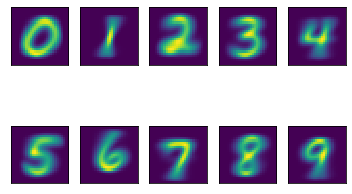

(10, 28, 28)


In [145]:
P_xy = computeXProbs(X, n_y, n_classes)
show_images(P_xy, 2, 5)
print(P_xy.shape)


[1.]
<NDArray 1 @cpu(0)>


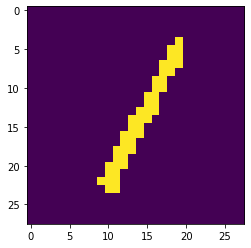

In [154]:
test = X[random.randint(0, X.shape[0])]
res = predict(test, P_xy, P_y, n_classes)
print(res)
plt.imshow(test.asnumpy())
plt.show()